# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

In [100]:
X_ = pd.read_csv('X_train.csv',index_col=[0,1])
y_ = pd.read_csv('y_train.csv',index_col=0)
X_test = pd.read_csv('X_test.csv',index_col=[0,1])
y_test = pd.read_csv('y_test.csv',index_col=0)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [101]:
X_train , X_valid, y_train, y_valid = train_test_split(X_,y_,test_size=0.25,random_state=17)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [102]:
depth_tree = DecisionTreeClassifier(max_depth=4,random_state=17)
depth_tree.fit(X_train,y_train)
importances = depth_tree.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_indices[:3]
X_train.iloc[:,sorted_indices[:3]]

,,53 tGravityAcc-min()-X,"394 fBodyAccJerk-bandsEnergy()-1,24","560 angle(Y,gravityMean)"
6754,29,0.940240,-0.565011,0.150598
1461,7,0.780998,-0.816506,0.215680
6633,29,0.989995,-0.999983,0.068684
6525,28,-0.654149,-0.999965,0.219030
4859,23,0.805501,-0.829062,0.239261
...,...,...,...,...
1337,7,0.970240,-0.999510,0.144089
406,3,-0.281043,-0.999864,-0.536666
5510,26,0.988478,-0.999977,0.179444
2191,11,0.937872,-0.600806,0.241396


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [103]:
depth_tree = DecisionTreeClassifier()

path = depth_tree.cost_complexity_pruning_path(X_train.iloc[:,sorted_indices[:3]],y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

In [104]:
trees = []
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha,random_state=17).fit(X_train.iloc[:,sorted_indices[:3]],y_train)
    trees.append(tree)

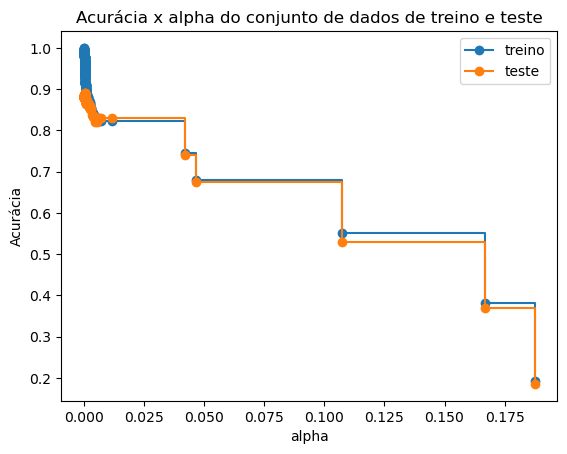

0.8895538628944505

In [105]:
train_scores = [tree.score(X_train.iloc[:,sorted_indices[:3]],y_train) for tree in trees]
test_scores = [tree.score(X_valid.iloc[:,sorted_indices[:3]],y_valid) for tree in trees]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()
max(test_scores)

In [106]:
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
best_tree = trees[ind_melhor_arvore]

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [107]:
print(best_tree.score(X_test.iloc[:,sorted_indices[:3]],y_test))
y_pred = best_tree.predict(X_test.iloc[:,sorted_indices[:3]])

0.7000339328130302


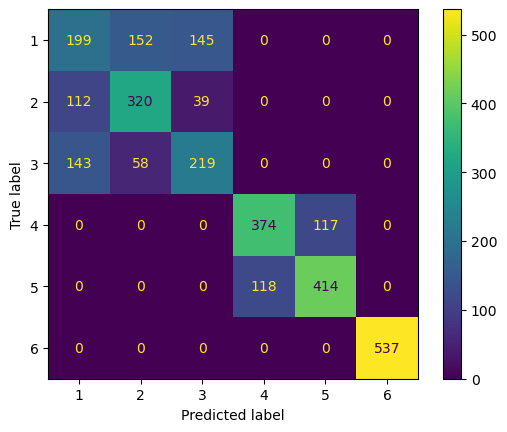

In [108]:
cm = confusion_matrix(y_test, y_pred , labels=best_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot()
plt.show()